**Francisco Leonid Galvez Flores**

**A01174385**

[**Enlace al repositorio en GitHub**](https://github.com/G4LF0/Evidencia2PortafolioDeImplementacion)

# **Librerias:**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importamos las librerias necesarias para algunos procesos a realizar antes de la implementacion del modelo.

# **Importacion de la base de datos:**

In [5]:
url = "https://raw.githubusercontent.com/G4LF0/MLAlgorithmFramework/main/breast-cancer.csv"

In [6]:
df = pd.read_csv(url)
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


Declaramos el dataframe con ayuda de la libreria de pandas, la base de datos se encuentra alojada en nuestro repositorio en GitHub.

# **Analisis exploratorio de los datos:**

In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

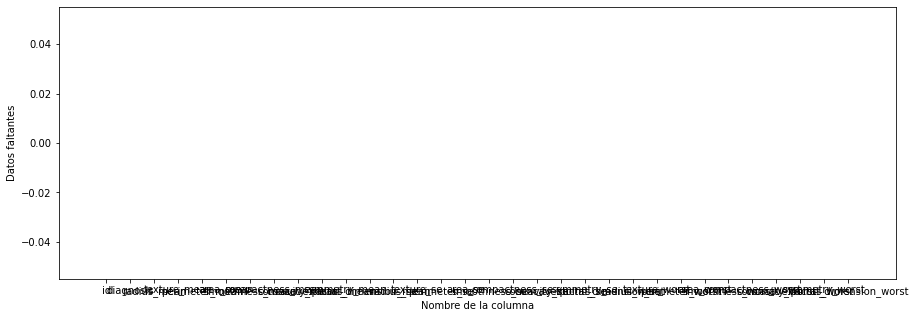

In [8]:
bardata = df.isnull().sum()
plt.figure(figsize=(15,5))
plt.bar(df.columns, bardata, color = "blue")
plt.xlabel('Nombre de la columna')
plt.ylabel('Datos faltantes')
plt.show()

Cambiamos los valores de la variable diagnostico, se encontraban en texto y los pasamos a una variable binaria.

In [9]:
df.diagnosis = df.diagnosis.map({"M":1, "B":0})
df.shape

(569, 32)

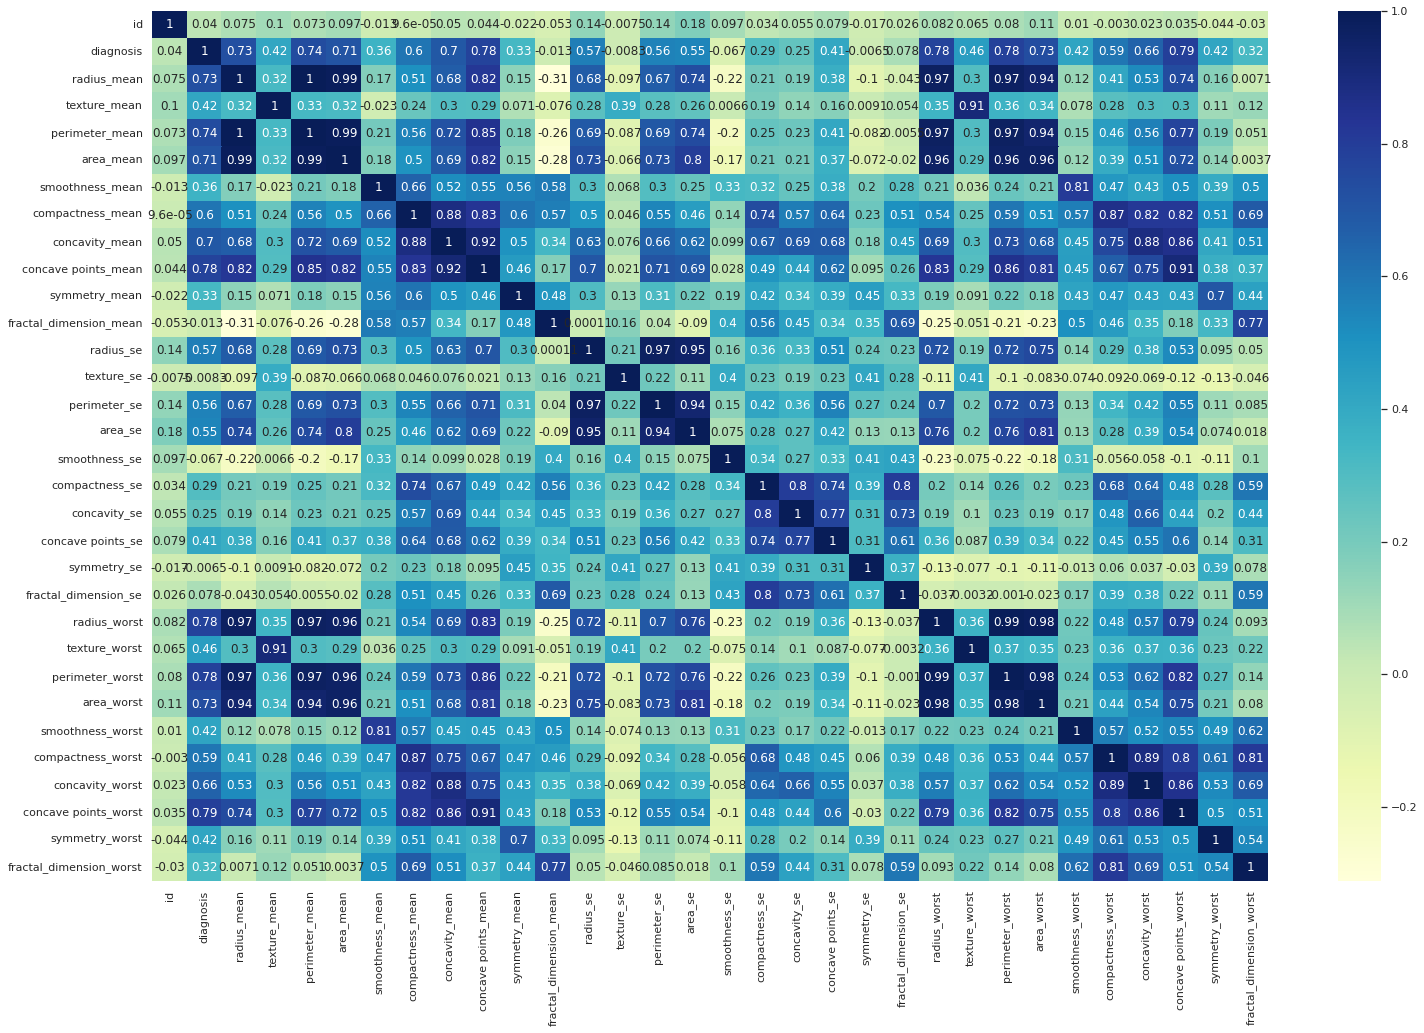

In [10]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

In [11]:
df = df.drop(["id",
              "texture_mean",
              "smoothness_mean",
              "compactness_mean",
              "symmetry_mean",
              "fractal_dimension_mean",
              "radius_se",
              "texture_se",
              "perimeter_se",
              "area_se",
              "smoothness_se",
              "compactness_se",
              "concavity_se",
              "concave points_se",
              "symmetry_se",
              "fractal_dimension_se",
              "texture_worst",
              "smoothness_worst",
              "compactness_worst",
              "concavity_worst",
              "symmetry_worst",
              "fractal_dimension_worst"], axis = 1)
df.head(1)

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,1,17.99,122.8,1001.0,0.3001,0.1471,25.38,184.6,2019.0,0.2654


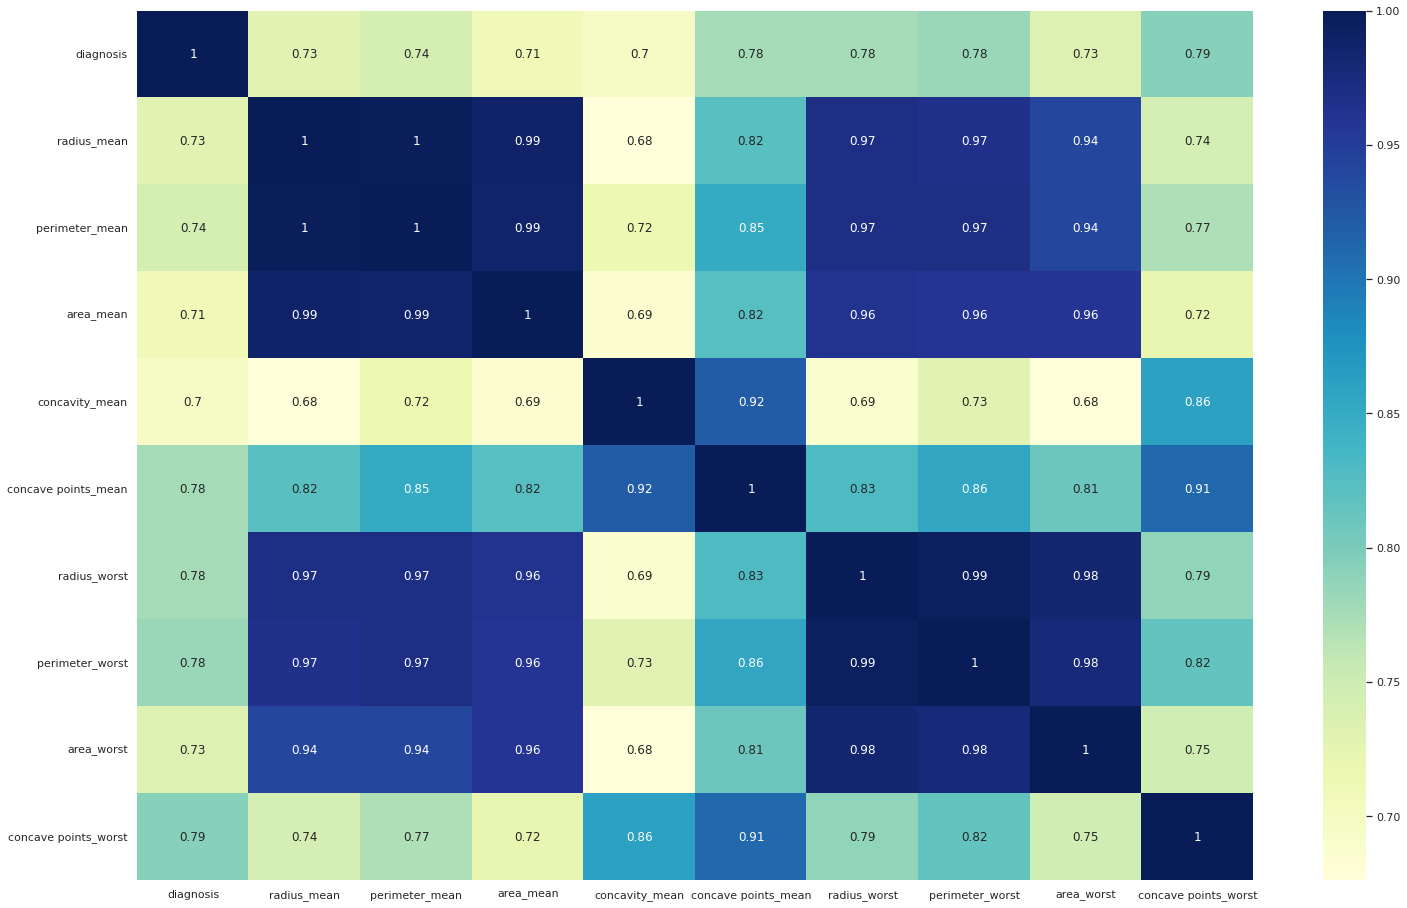

In [12]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

En esta parte lo que hicimos fue analizar columnas que no tuvieran relacion con la variable a predecir, asi como tambien cambiamos el valor de algunos variables para convertirlas en binarias.

# **Division de los datos en trainig, validating and testing:**

In [13]:
x = df.drop(["diagnosis"], axis = 1)
y = df.diagnosis

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, train_size=0.9, random_state=16)

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.7, random_state=16)

In [16]:
datos_n = [x_train.shape[0], x_val.shape[0], x_test.shape[0]]

In [17]:
df_mcd = pd.DataFrame({"Datos: ":["Training", "Validating", "Testing"],
                       "Registros": datos_n})
df_mcd

,Datos:,Registros
0,Training,358
1,Validating,154
2,Testing,57


En esta parte lo que hacemos es divir el data set, al principio lo dividimos en un 90% para training y un 10% para test, despues lo que hacemos es que del 30% del 90% de training lo convertimos en validating.

# **Implementacion del modelo:**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter= 10000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_train)

Implementamos el algoritmo de regresion logistica con un numero de iteraciones maxima de 10,000.

Accuracy for training:

In [19]:
score =accuracy_score(y_train,y_pred)
accuracy_training = score
print("Accuracy for the training set is: ", round(score*100, 4))

Accuracy for the training set is:  93.8547


In [20]:
x = np.arange(0, x_train.shape[0])

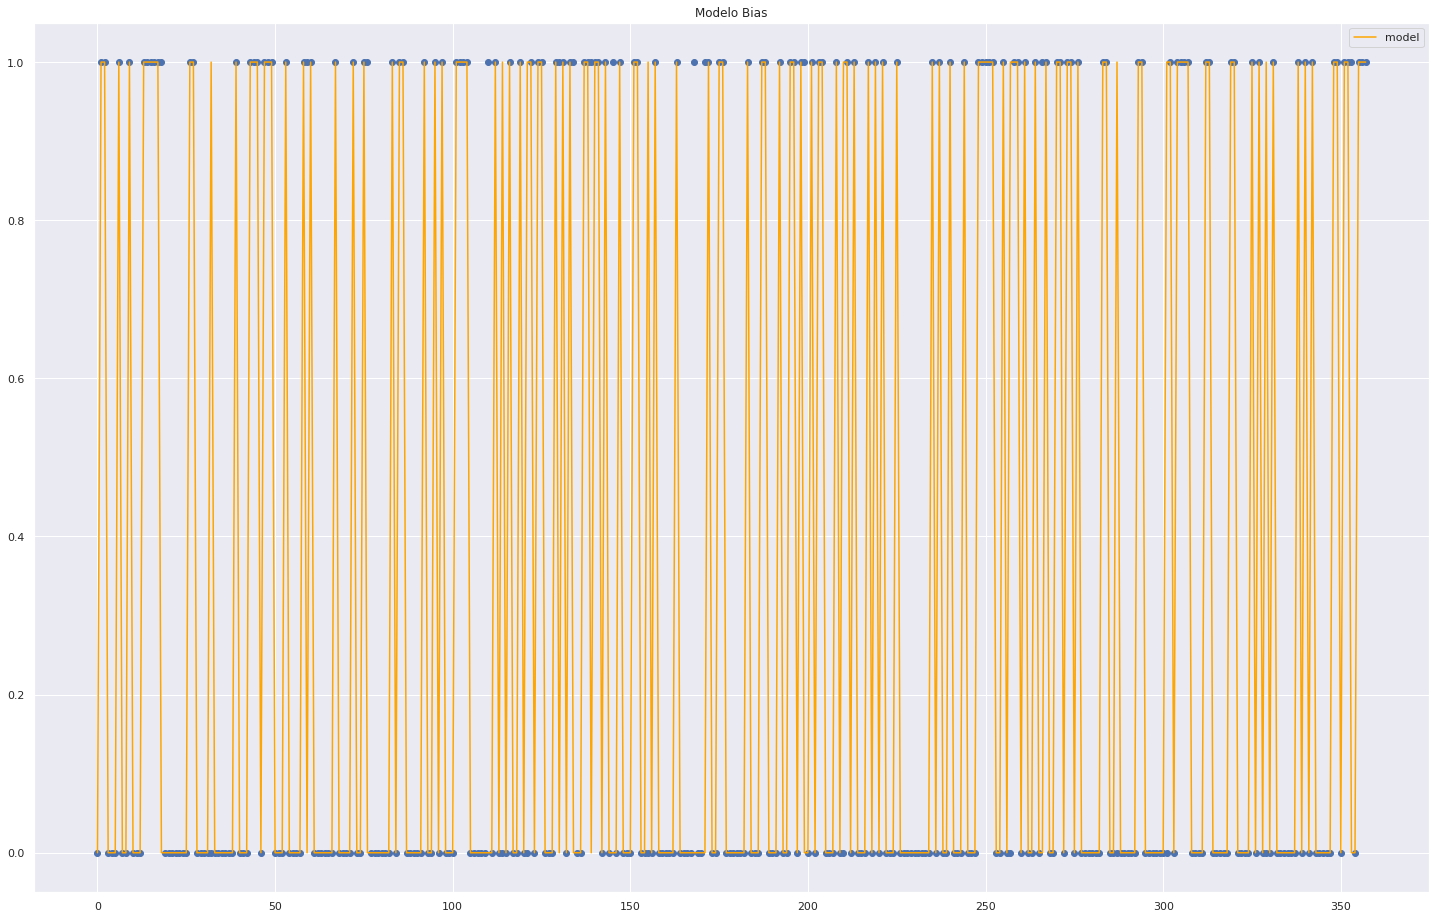

In [21]:
plt.scatter(x, y_train)
plt.plot(x, y_pred, color='orange', label='model')
plt.title('Modelo Bias')
plt.legend();

Accuracy for validating:

In [22]:
y_pred = logreg.predict(x_val)
score =accuracy_score(y_val,y_pred)
accuracy_validating = score
print("Accuracy for the training set is: ", round(score*100, 4))

Accuracy for the training set is:  96.1039


In [23]:
x = np.arange(0, x_val.shape[0])

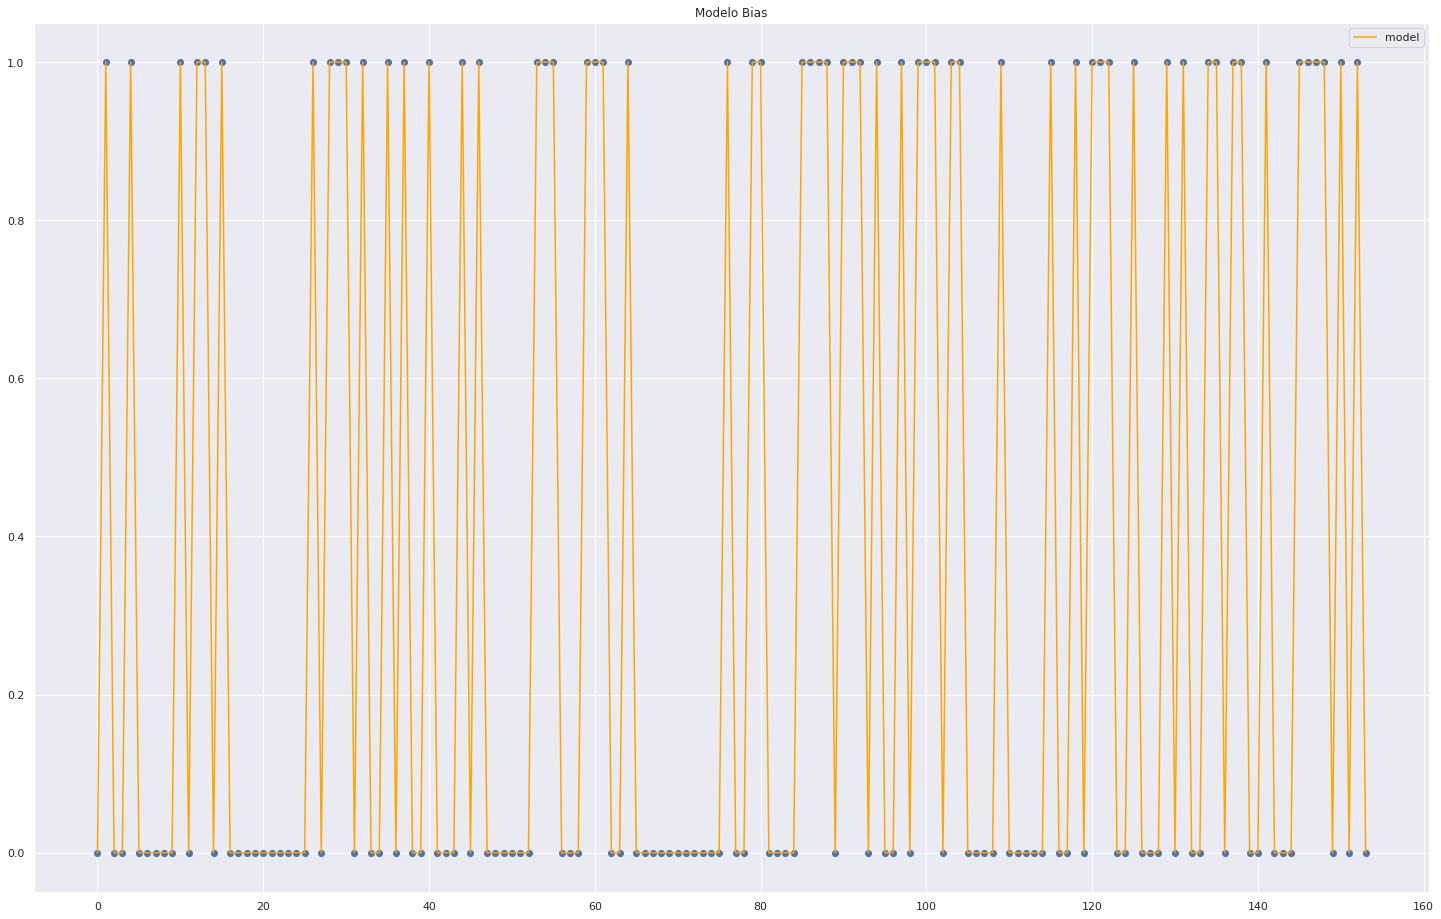

In [24]:
plt.scatter(x, y_val)
plt.plot(x, y_val, color='orange', label='model')
plt.title('Modelo Bias')
plt.legend();

# **Metricas:**

Metricas del training:

In [25]:
from sklearn import metrics

y_pred = logreg.predict(x_train)
confusion_matrix = metrics.confusion_matrix(y_train, y_pred)
mt = confusion_matrix
mt

array([[217,   9],
       [ 13, 119]])

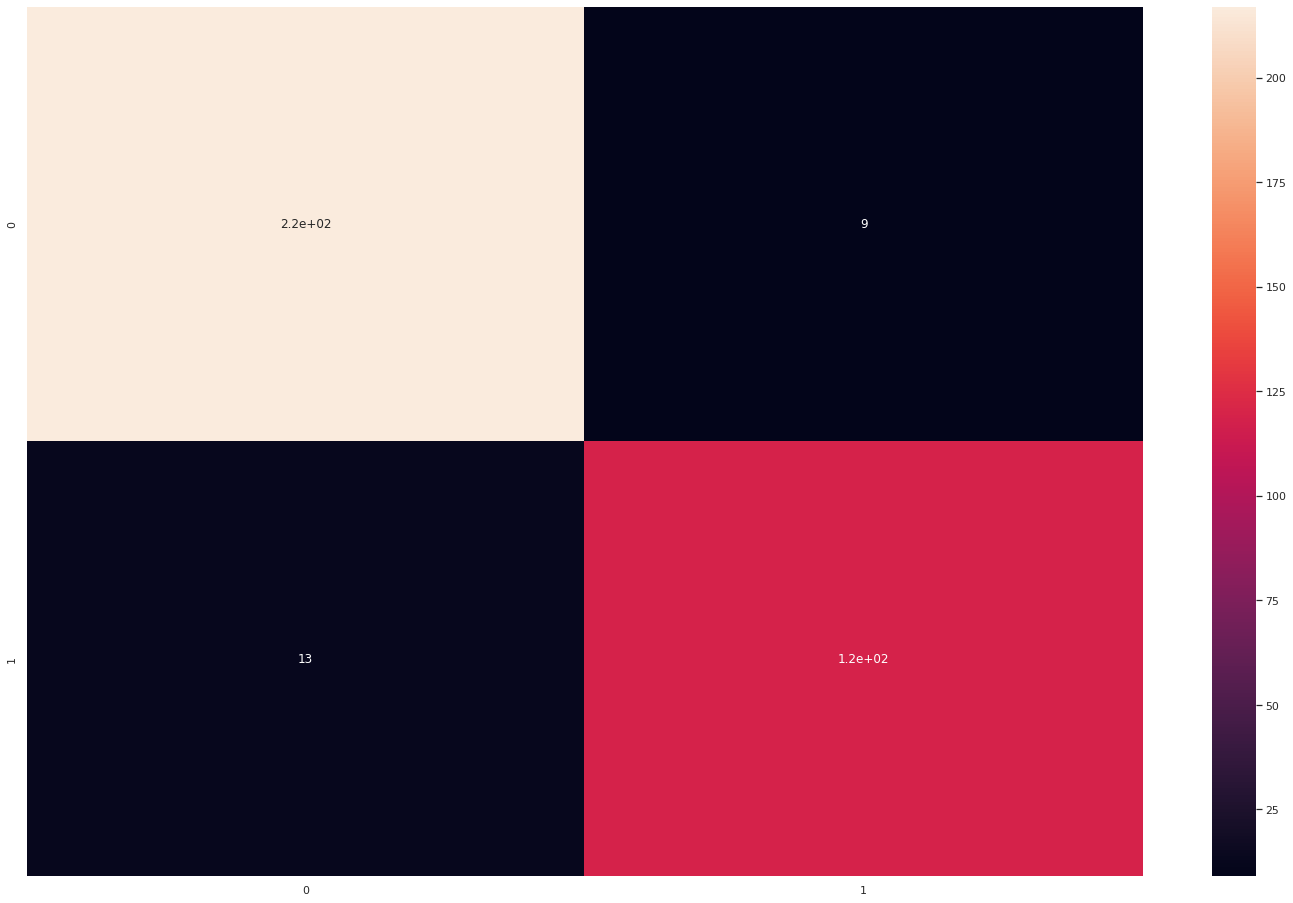

In [26]:
sns.heatmap(confusion_matrix, annot=True)

In [27]:
from sklearn.metrics import classification_report

target_names = ['Sin tumor', 'Con tumor']
print(classification_report(y_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Sin tumor       0.94      0.96      0.95       226
   Con tumor       0.93      0.90      0.92       132

    accuracy                           0.94       358
   macro avg       0.94      0.93      0.93       358
weighted avg       0.94      0.94      0.94       358



Accuracy:

In [28]:
from sklearn.metrics import accuracy_score
acc = (accuracy_score(y_train, y_pred))*100
acc = round(acc, 2)
print("El accuracy es: ", acc, "%")

El accuracy es:  93.85 %


Recall:

In [29]:
from sklearn.metrics import recall_score
rec = (recall_score(y_train, y_pred)*100)
rec = round(rec, 2)
print("El recall es: ", rec, "%")

El recall es:  90.15 %


Precision:

In [30]:
from sklearn.metrics import precision_score
pre = (precision_score(y_train, y_pred))*100
pre = round(pre, 2)
print("La precision es: ", pre, "%")

La precision es:  92.97 %


Metricas del validating:

In [31]:
from sklearn import metrics

y_pred = logreg.predict(x_val)
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)
mv = confusion_matrix
mv

array([[93,  1],
       [ 5, 55]])

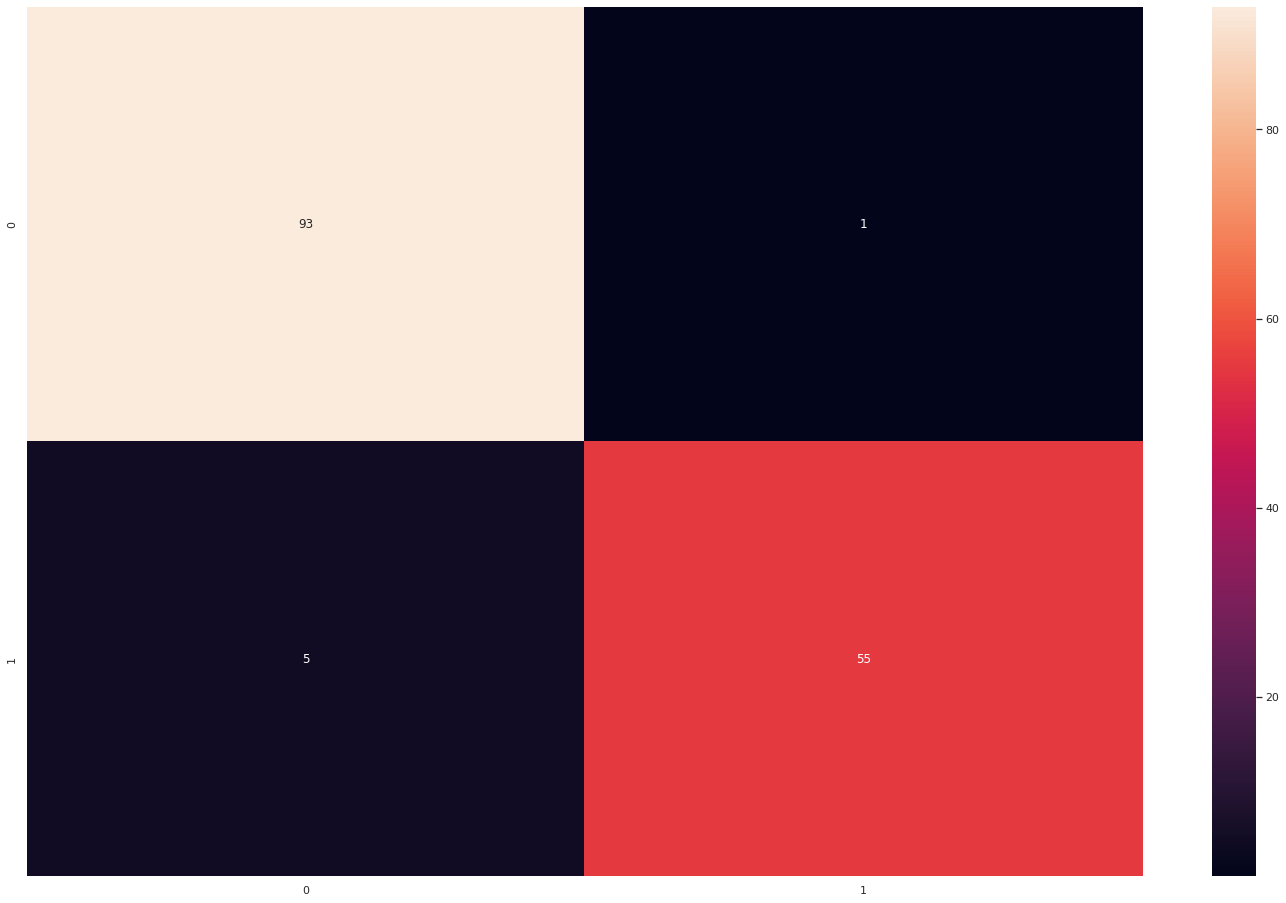

In [32]:
sns.heatmap(confusion_matrix, annot=True)

In [33]:
from sklearn.metrics import classification_report

target_names = ['Sin tumor', 'Con tumor']
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Sin tumor       0.95      0.99      0.97        94
   Con tumor       0.98      0.92      0.95        60

    accuracy                           0.96       154
   macro avg       0.97      0.95      0.96       154
weighted avg       0.96      0.96      0.96       154



Accuracy:

In [34]:
from sklearn.metrics import accuracy_score
acc = (accuracy_score(y_val, y_pred))*100
acc = round(acc, 2)
print("El accuracy es: ", acc, "%")

El accuracy es:  96.1 %


Recall:

In [35]:
from sklearn.metrics import recall_score
rec = (recall_score(y_val, y_pred)*100)
rec = round(rec,2)
print("El recall es: ", rec, "%")

El recall es:  91.67 %


Precision:

In [36]:
from sklearn.metrics import precision_score
pre = (precision_score(y_val, y_pred)*100)
pre = round(pre, 2)
print("La precision es: ", pre, "%")

La precision es:  98.21 %


# **Explicaciones dada las metricas:**

In [37]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
#%pip install mlxtend --upgrade

In [39]:
from mlxtend.evaluate import bias_variance_decomp

In [40]:
mse, bias, var = bias_variance_decomp(logreg, x_train, y_train, x_val, y_val, loss="mse", num_rounds=200, random_seed=1)

## **Bias o sesgo:**

Como bien sabemos este tipo de error es la diferencia entre la         prediccion esperada de nuestro modelo y los valores verdaderos.
Un bajo nivel de bias sugiere menos suposicion sobre la forma de la funcion objetivo mientras que un alto bias sugiere mas posiciones sobre la forma de la funcion objetico.

In [41]:
print('Bias o sesgo: %.3f' % bias)

Bias o sesgo: 0.033


Que el nivel de sesgo fuera bajo fue algo raro debido a que esto sucede mas en otro tipo de algoritmos, tales como KN, SVM, arboles de decision, etc, lo que este valor nos sugierre es que debemos tener menor suposicion sobre la forma de la funcion objetivo.

## **Varianza**

Este error se refiere a la variabilidad o sensibilidad del modelo tran hacer modificaciones o cambios en los datos. Esto significa que los modelos de alta varianza generalmente se ajustaran bien a los datos de entrenamiento y por lo tanto lograran un rendimiento mucho mayo dentro de la muestra mientras que por el contrario este rendimiento sera mucho menor fuera de esta.
Idealmente no deberia cambiar demasiado de un conjunto de datos de entrenamiento a otro.
Los algoritmos que tiene un alto nivel de varianza usualmente son los que esta maytormente influenciados por los datos de entrenamiento.

In [42]:
print('Varianza: %.3f' % var)

Varianza: 0.011


Dado que obtuvimos una varianza baja, se dice que se deben hacer ligeros cambios en la estimacion de la funcion objetivo con cambios en el conjunto de datos de capacitacion y esto era de esperarse porque estamos implementando un algoritmo de regresion logistica.

In [43]:
print('MSE: %.3f' % mse)

MSE: 0.045


## **Nivel de ajuste del modelo**

El objetivo principal es lograr un bias bajo asi como una baja varianza, por lo que podemos ver anteriormente nuestro modelo dispone de ambas, 

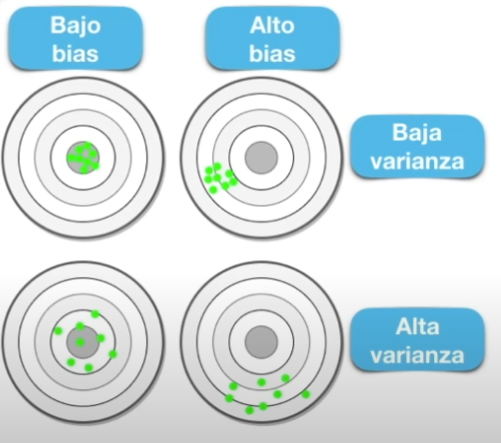

Dado lo analizado anteriormente y viendo el error aceptable en el set entrenamiento asi como el error aceptable en el set de validacion asumimos que nuestro modelo dispone de un **buen valance**.

# **Curva ROC**

Training:

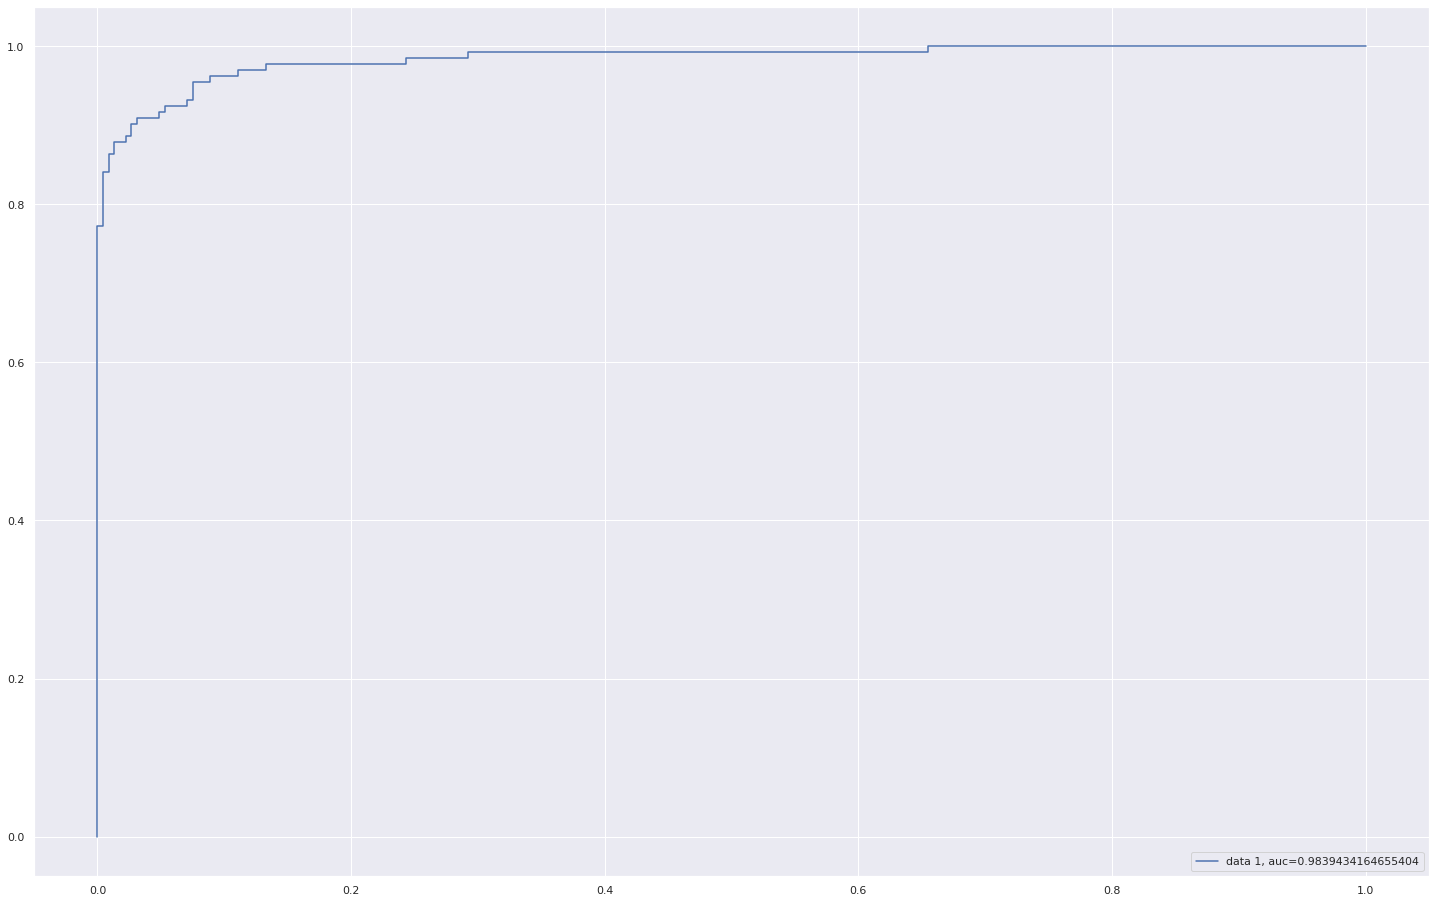

In [44]:
y_pred_proba = logreg.predict_proba(x_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Validating:

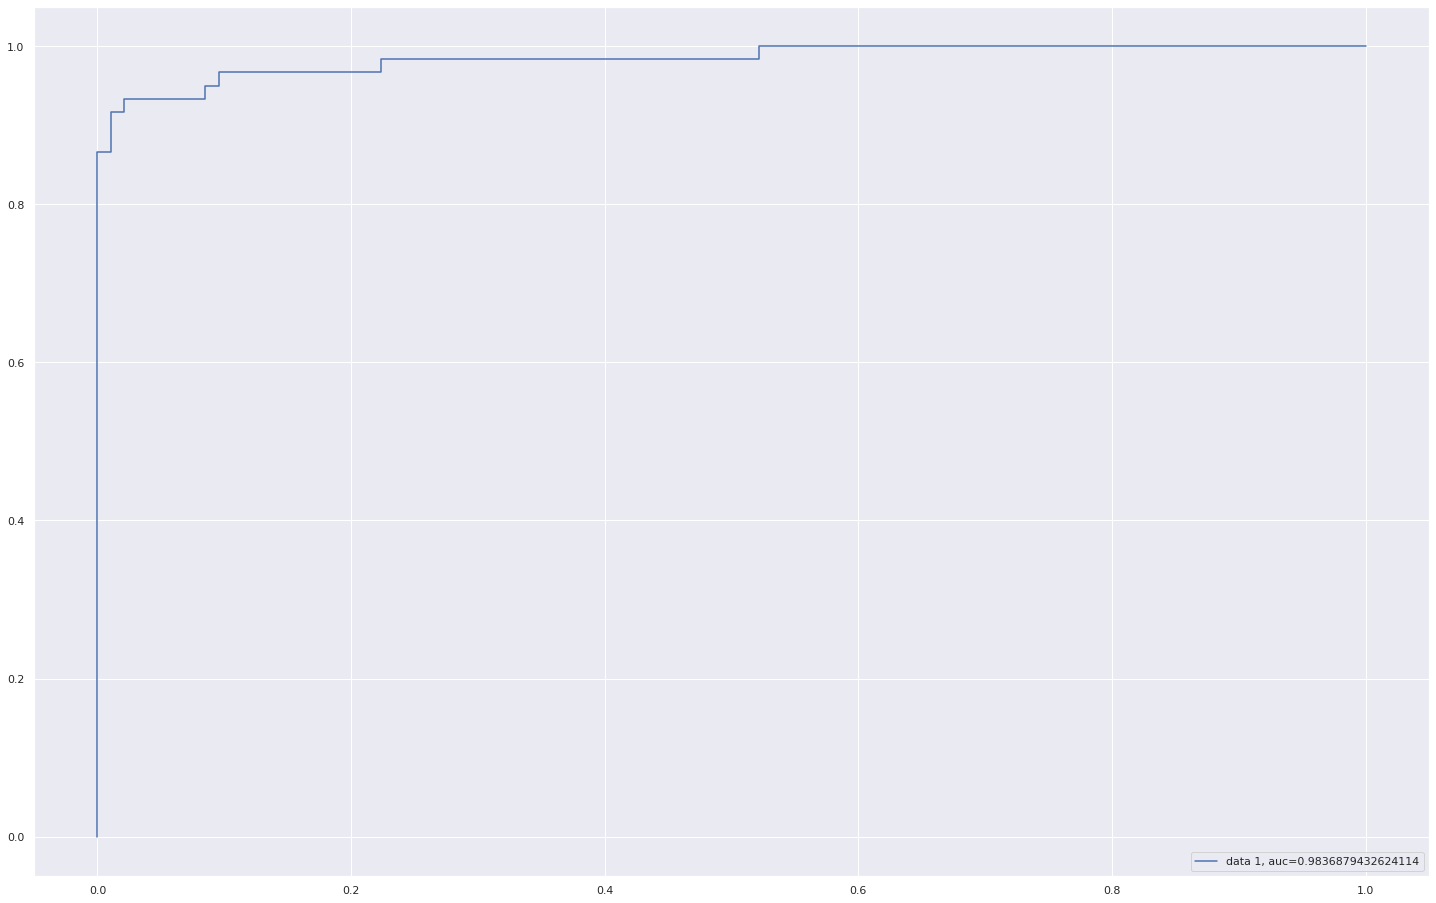

In [45]:
y_pred_proba = logreg.predict_proba(x_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Tenemos que decir que la curva ROC es un grafico en el que se ponen los valores positivos y falsos en cada eje, y como podemos ver dieron un muy buen accuracy tanto en el dataset de training como en el dataset de validacion.

# **Tabla de accuracys:**

In [46]:
df_accuracys = pd.DataFrame({"Datos: ":["Training", "Validating"],
                             "Registros": [accuracy_training, accuracy_validating]})
df_accuracys

,Datos:,Registros
0,Training,0.938547
1,Validating,0.961039


Como podemos ver nuestro modelo dispone de muy poco error en el dataset de training y mucho menos error en el dataset de validacion, por lo que decimos que se encuentra en **balance**.

# **Predicciones:**

In [47]:
df.head(2)

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,1,17.99,122.8,1001.0,0.3001,0.14710,25.38,184.6,2019.0,0.2654
1,1,20.57,132.9,1326.0,0.0869,0.07017,24.99,158.8,1956.0,0.1860


In [48]:
"""
from sklearn.datasets import make_blobs
x_pred, _ = make_blobs(n_samples=5, centers=2, n_features=25, random_state=1)
y_pred = logreg.predict(x_pred)
for i in range(len(x_pred)):
  print("X=%s, Prediccion=%s" % (x_pred[i], y_pred[i]))
"""

'\nfrom sklearn.datasets import make_blobs\nx_pred, _ = make_blobs(n_samples=5, centers=2, n_features=25, random_state=1)\ny_pred = logreg.predict(x_pred)\nfor i in range(len(x_pred)):\n  print("X=%s, Prediccion=%s" % (x_pred[i], y_pred[i]))\n'

In [49]:
 l = np.random.randint(low=0, high=52)
 x_pred = x_test[l:l+5]

In [50]:
y_pred = logreg.predict(x_pred)

In [51]:
y_pred

array([1, 1, 0, 0, 0])

In [52]:
pd.DataFrame({"Numero de prediccion":["1", "2", "3", "4", "5"],
              "Prediccion":y_pred})

,Numero de prediccion,Prediccion
0,1,1
1,2,1
2,3,0
3,4,0
4,5,0


# **Tecnicas de regularizacion para mejor desempeño del modelo:**

Para esta parte lo que hicimos fue realizar regularizacion L2.

Antes que nada decimos que existe la probabilidad de que en la regresion logistica un modelo se sobreajuste, mas que nada cuando se trata de datos polinomicos, como es nuestro caso. 

Por lo que, para regularizar el algoritmo y con esto hacer que nuestra toma de decision no disponga de un limite, lo que hacemos es hacer una penalizacion al sesgo del modelo, la cual seria la regularizacion L2, que se define matematicamente de la siguiente manera:

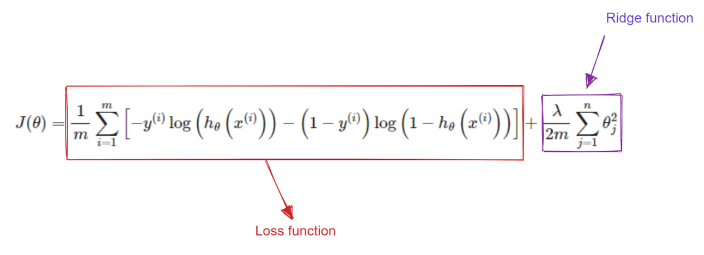

Como vemos lo que se hace es añadir una funcion de Ridge a la formula de gradiente descendente para asi obtener una optimizacion mas avanzada de nuestro algoritmo.

In [53]:
regularized_lr = LogisticRegression(penalty='l2',solver='newton-cg',max_iter=200)
regularized_lr.fit(x_train,y_train)
reg_pred=regularized_lr.predict(x_val)

In [54]:
print('Precision score',np.round(precision_score(y_val,reg_pred),2))
print('Recall score',np.round(recall_score(y_val,reg_pred),2))

Precision score 0.98
Recall score 0.92


Dado los resultados podemos notar un ligero overfitting de nuestro modelo, si bien no es mucho se debe tomar en cuenta que esto sucedio.

In [55]:
confusion_matrix = metrics.confusion_matrix(y_val, reg_pred)
confusion_matrix

array([[93,  1],
       [ 5, 55]])

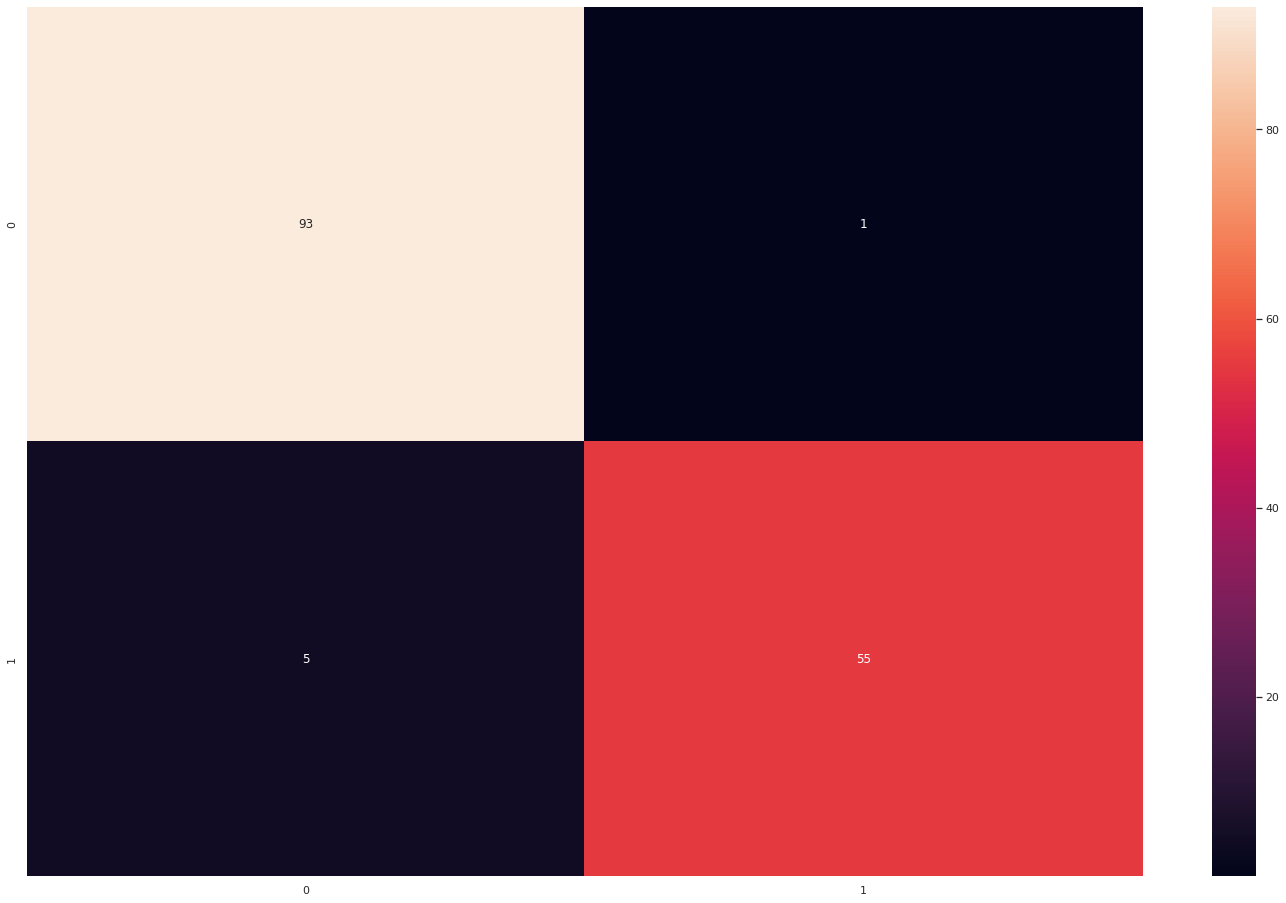

In [56]:
sns.heatmap(confusion_matrix, annot=True)